In [1]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

# ÏãúÍ∞Ñ Í¥ÄÎ†®
import time

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ÌååÏùº Í≤ΩÎ°ú
import pandas as pd

# 1. ÌååÏùº Í≤ΩÎ°ú
file_path = 'data/ÏÑ±Í≥ºÏ†ïÎ≥¥_with_segment.csv'

# 2. ÏÇ¨Ïö©Ìï† Ïª¨Îüº Î¶¨Ïä§Ìä∏
selected_columns = [
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞",
    "ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r6m", "ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m", "ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m", "ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m",
    "ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r6m", "ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m", "ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m", "ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m",
    "Î≥ÄÎèôÎ•†_RVÏùºÏãúÎ∂àÌèâÏûî", "Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî", "Î≥ÄÎèôÎ•†_RVCAÌèâÏûî", "Î≥ÄÎèôÎ•†_Ïπ¥ÎìúÎ°†ÌèâÏûî"
]

In [5]:
# 3. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv(file_path, usecols=selected_columns)

# Í≤∞Í≥º ÌôïÏù∏
display(df)

Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî  \
0              1.999996             0.0        0.000000        0.409766   
1              0.000000             0.0        0.000000       -1.010817   
2             -1.999996             0.0        0.000000       -0.902166   
3             -1.999996             0.0        0.000000       -0.866052   
4              0.000000             0.0        0.000000        0.000028   
...                 ...             ...             ...             ...   
2399995        0.000000             0.0       -0.081943        0.000027   
2399996        0.000000             0.0        0.000000        0.207099   
2399997        0.000000             0.0        0.000000        0.254495   
2399998        0.000000             0.0        0.000000        0.000034   
2399999        0.000000             0.0        0.000000        0.332268   

         Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞  \
0              0.409766         0.313300        1.999996       -0.476453   
1             -1.010817        -1.010817        0.000000        0.226240   
2             -0.902166         0.289565       -1.999996        0.158594   
3             -0.866052         0.276947       -0.138126        0.120484   
4              0.000028         0.000028        0.000000       -1.999996   
...                 ...              ...             ...             ...   
2399995        0.000027         0.000027        0.000000        0.000000   
2399996        0.207099         0.207099        0.000000       -0.679340   
2399997        0.254495         0.229573       -1.999996       -0.271198   
2399998        0.000034         0.000034        0.000000        0.000000   
2399999        0.332268         0.284271       -0.137569        0.319522   

         Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞  ...  ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m  \
0             -0.476453        -0.476453  ...          0.154402   
1              0.226240         0.226240  ...          0.658524   
2              0.158594         0.030082  ...          0.268120   
3              0.120484         0.120484  ...          0.337358   
4             -1.999996        -1.999996  ...          0.000000   
...                 ...              ...  ...               ...   
2399995        0.000000         0.000000  ...          0.014102   
2399996       -0.679340        -0.679340  ...          0.061004   
2399997       -0.271198        -0.286386  ...          0.111780   
2399998        0.000000         0.000000  ...          0.012544   
2399999        0.319522         0.319522  ...          0.000000   

         ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m  ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r6m  ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r6m  \
0                0.194447            0.803171            0.849842   
1                0.807739            0.630098            0.851009   
2                0.334369            0.662760            0.938161   
3                0.424204            0.959484            1.135424   
4                0.000000            0.011619            0.000000   
...                   ...                 ...                 ...   
2399995          0.021460            0.000000            0.032439   
2399996          0.093002            0.097646            0.168081   
2399997          0.183969            0.096427            0.190393   
2399998          0.009594            0.000000            0.012677   
2399999          0.024196            0.035189            0.053036   

         ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m  ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m  Î≥ÄÎèôÎ•†_RVÏùºÏãúÎ∂àÌèâÏûî  Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî  \
0                  0.804911            0.885171     0.999998  1.042805   
1                  0.676044    

### Ïï†Îß§ÌñàÎçò Ïª¨ÎüºÎì§ VIF Î∞è ÏÉÅÍ¥Ä ÌôïÏù∏ ÌõÑ Ï†úÍ±∞

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# ÏÇ¨Ïö©Ìï† Ïª¨Îüº Î™©Î°ù
vif_cols = [
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞", "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞",
    "ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m", "ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m", "ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m", "ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m"
]

# VIF Í≥ÑÏÇ∞Ïö© Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (Í≤∞Ï∏° Ï†úÍ±∞ ÎòêÎäî ÎåÄÏ≤¥ ÌïÑÏöî)
vif_df = df[vif_cols].dropna()

# VIF Í≥ÑÏÇ∞
vif_result = pd.DataFrame()
vif_result["Feature"] = vif_df.columns
vif_result["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]

# Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ VIF Í≤∞Í≥º:")
display(vif_result.sort_values(by="VIF", ascending=False))

‚úÖ VIF Í≤∞Í≥º:


Feature         VIF
12    ÏûîÏï°_Ïã†ÌåêÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m  214.342107
11    ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m  200.610836
14  ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m  189.422592
13  ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m  168.672361
5       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Î∂ÑÍ∏∞   82.344206
8       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞   68.869151
4       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞   59.796609
7       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Î∂ÑÍ∏∞   52.471126
6      Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞   34.440893
9      Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞   28.282994
1       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî    1.167940
10      Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ï≤¥ÌÅ¨_Î∂ÑÍ∏∞    1.111428
0       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî    1.088959
2       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî    1.061900
3       Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ìï†Î∂Ä_Ï†ÑÏõî    1.050845

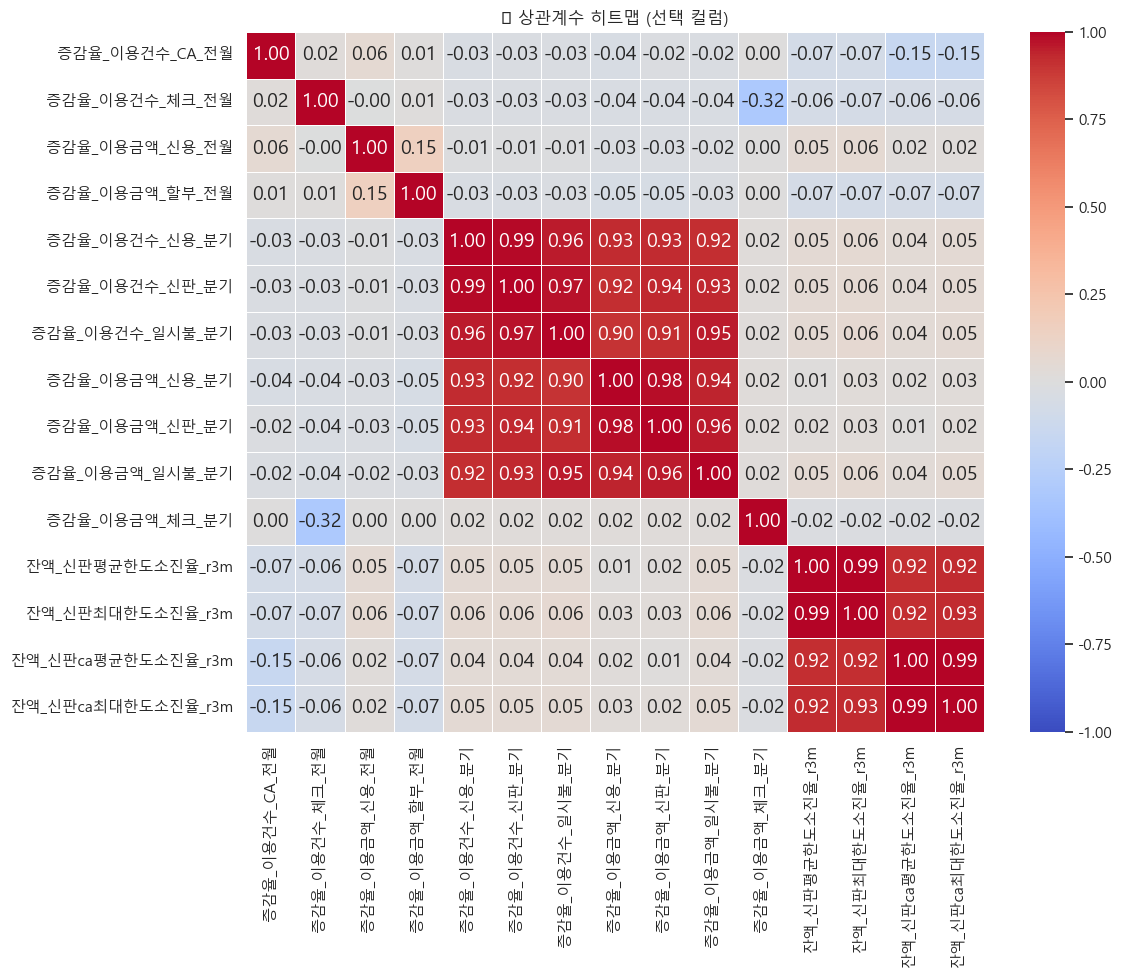

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr = df[vif_cols].corr()

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmax=1, vmin=-1)
plt.title("üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌûàÌä∏Îßµ (ÏÑ†ÌÉù Ïª¨Îüº)")
plt.tight_layout()
plt.show()

### ÏµúÏ¢Ö ÏÑ†Ï†ïÎêú ÌååÏùº csv ÌååÏùºÎ°ú Ï†ÄÏû•ÌïòÍ∏∞

In [17]:
# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú Ï†úÍ±∞Ìï† Ïª¨Îüº Î™©Î°ù
drop_cols = [
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Î∂ÑÍ∏∞",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ìåê_Î∂ÑÍ∏∞",
    "Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_ÏùºÏãúÎ∂à_Î∂ÑÍ∏∞",
    "ÏûîÏï°_Ïã†ÌåêÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m",
    "ÏûîÏï°_Ïã†ÌåêcaÏµúÎåÄÌïúÎèÑÏÜåÏßÑÏú®_r3m",
    "ÏûîÏï°_Ïã†ÌåêcaÌèâÍ∑†ÌïúÎèÑÏÜåÏßÑÏú®_r3m"
]


In [19]:
import pandas as pd

# 1. ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = 'data/ÏÑ±Í≥ºÏ†ïÎ≥¥_with_segment.csv'
df = pd.read_csv(file_path)

# 2. Ïª¨Îüº Ï†úÍ±∞
df_cleaned = df.drop(columns=drop_cols)

# 3. Ï†ÄÏû• (CSVÎ°ú)
save_path = 'data/ÏÑ±Í≥ºÏ†ïÎ≥¥_selected_columns.csv'
df_cleaned.to_csv(save_path, index=False, encoding='utf-8-sig')

print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å! Ï¥ù {len(drop_cols)}Í∞ú Ïª¨Îüº Ï†úÍ±∞Îê®")
print(f"üìÅ Ï†ÄÏû• Í≤ΩÎ°ú: {save_path}")

‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å! Ï¥ù 6Í∞ú Ïª¨Îüº Ï†úÍ±∞Îê®
üìÅ Ï†ÄÏû• Í≤ΩÎ°ú: data/ÏÑ±Í≥ºÏ†ïÎ≥¥_selected_columns.csv


In [23]:
# Í≤∞Í≥º ÌôïÏù∏Ïö©
check_point = pd.read_csv('data/ÏÑ±Í≥ºÏ†ïÎ≥¥_selected_columns.csv')
check_point

Í∏∞Ï§ÄÎÖÑÏõî            ID  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ïö©_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïã†Ìåê_Ï†ÑÏõî  \
0        201807  TRAIN_000000        0.454548        0.454548   
1        201807  TRAIN_000001       -0.511808       -0.511808   
2        201807  TRAIN_000002       -0.062716       -0.062716   
3        201807  TRAIN_000003        0.135707        0.135707   
4        201807  TRAIN_000004        0.000000        0.000000   
...         ...           ...             ...             ...   
2399995  201812  TRAIN_399995        0.000000        0.000000   
2399996  201812  TRAIN_399996        0.073804        0.073804   
2399997  201812  TRAIN_399997       -0.040432       -0.040432   
2399998  201812  TRAIN_399998        0.000000        0.000000   
2399999  201812  TRAIN_399999        0.187598        0.187598   

         Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_ÏùºÏãúÎ∂à_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ìï†Î∂Ä_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_CA_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ï≤¥ÌÅ¨_Ï†ÑÏõî  \
0               0.364727        1.999996             0.0        0.000000   
1              -0.511808        0.000000             0.0        0.000000   
2               0.067843       -1.999996             0.0        0.000000   
3               0.153975       -1.999996             0.0        0.000000   
4               0.000000        0.000000             0.0        0.000000   
...                  ...             ...             ...             ...   
2399995         0.000000        0.000000             0.0       -0.081943   
2399996         0.073804        0.000000             0.0        0.000000   
2399997        -0.040432        0.000000             0.0        0.000000   
2399998         0.000000        0.000000             0.0        0.000000   
2399999         0.187598        0.000000             0.0        0.000000   

         Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í±¥Ïàò_Ïπ¥ÎìúÎ°†_Ï†ÑÏõî  Ï¶ùÍ∞êÏú®_Ïù¥Ïö©Í∏àÏï°_Ïã†Ïö©_Ï†ÑÏõî  ...  Î≥ÄÎèôÎ•†_Ìï†Î∂ÄÌèâÏûî  Î≥ÄÎèôÎ•†_CAÌèâÏûî  Î≥ÄÎèôÎ•†_RVCAÌèâÏûî  \
0                    0.0        0.409766  ...  1.042805  0.999700    0.999998   
1                    0.0       -1.010817  ...  0.905663  0.999998    0.999998   
2                    0.0       -0.902166  ...  1.993590  0.852567    0.999998   
3                    0.0       -0.866052  ...  1.050646  0.999877    0.999998   
4                    0.0        0.000028  ...  0.999998  0.999998    0.999998   
...                  ...             ...  ...       ...       ...         ...   
2399995              0.0        0.000027  ...  0.999998  0.999998    0.999998   
2399996              0.0        0.207099  ...  0.999998  0.999998    0.999998   
2399997              0.0        0.254495  ...  0.345027  0.999998    0.999998   
2399998              0.0        0.000034  ...  0.999998  0.999998    0.999998   
2399999              0.0        0.332268  ...  0.593160  0.999998    0.999998   

         Î≥ÄÎèôÎ•†_Ïπ¥ÎìúÎ°†ÌèâÏûî  Î≥ÄÎèôÎ•†_ÏûîÏï°_B1M  Î≥ÄÎèôÎ•†_ÏûîÏï°_ÏùºÏãúÎ∂à_B1M  Î≥ÄÎèôÎ•†_ÏûîÏï°_CA_B1M  ÌòúÌÉùÏàòÌòúÏú®_R3M  \
0         0.999998    0.261886        0.270752       0.000000   1.044401   
1         0.999998   -0.563388       -0.670348       0.000000   0.000000   
2         0.999998   -0.046516        0.058114      -0.014191   0.524159   
3         0.999998    0.023821        0.258943       0.000000   0.880925   
4         0.999998    0.000000        0.000000       0.000000        NaN   
...            ...         ...             ...            ...        ...   
2399995   0.999998    0.000000        0.000000       0.000000        NaN   
2399996   0.921733   -0.203251       -0.159143       0.000000   1.377071   
2399997   0.999998    0.027319        0.126581       0.000000   0.000000   
2399998   0.999998    0.000000        0.000000       0.000000        NaN   
2399999   0.999998   -0.039845       -0.002659       0.000000   0.000000   

         ÌòúÌÉùÏàòÌòúÏú®_B0M  Segment  
0         1.280543        D  
1         0.000000        E  
2         1.208420        C  
3         1.657124   